# Atividade 4 EQ024: Tecnologia da Fluidização

## Aluno: João Eduardo Levandoski

In [16]:
import matplotlib.pyplot as plt

# Propriedades

**Fluido:**

 - Tipo de gás: Ar comprimido         
     - $\rho$$_g$ (kg.m$^{-3}$): 1,116 @ T ($^o$C): 43 +/- 2           
     - $\mu$$_g$ (kg.m$^{-1}$.s$^{-1}$): 18 x 10$^{-6}$ @ T ($^o$C): 22    
    
    
**Partículas:**

 - Classificação de Gerald: D          
 - Modelo de distribuição escolhido: RRB  
     - $\rho$$_{part}$ (kg/m$³$): 1159 - 1217  
     - $\epsilon$$_{part}$(%): 52,55 - 54,22       
     - $\phi$$_{part}$: 0,34 - 0,37        
     - d$_{ps}$($\mu$m): 3586,68      


### Início dos dados para teste

In [17]:
d_sauter = 160*10**-6                          
densi_gas = 3.6                 
temp = 43                   
densi_part = 1500 #Aparente                   
# densi_part = 1217 #Real                   
g = 9.8                  
visc = 20*10**-6                 
esf = 0.35                  

In [18]:
D_c = 4
Lmf = 2
emf = 0.48 # Tannous 
U = 0.4 #7.63 - 8.24 #???

### Final dos dados para teste

In [19]:
d_sauter = 3586.68*10**-6
densi_gas = 1.116
temp = 43
### densi_part = 557.10 #Aparente
densi_part = 1217 #Real
g = 9.81
visc = 18*10**-6
esf = 0.35

# Características do Equipamento/leito

**Equipamento:**

 - Diâmetro: 250 mm
 - Altura: 800 mm 
 
 
**Leito:**

 - Altura: 187 - 203 mm
 

In [20]:
D_c = 0.25
Lmf = 1.13*0.203
emf = 0.581893 # Fatah
U = 2*(1.17) #7.63 - 8.24 #??

In [21]:
# global U

# Etapa 1              
## Determinar  a  queda  de  pressão  mínima  permitida  através  do  distribuido

In [22]:
Pb = (1 - emf)*(densi_part - densi_gas)*g*Lmf
Pb

1143.9922200333008

In [23]:
Pd = 0.3*Pb
Pd

343.1976660099902

# Etapa 2
## Determinando o coeficiente  do orifício

In [24]:
Re = D_c*U*densi_gas/visc
Re

36270.0

In [25]:
Cd_or = 0.6  # Pois está acima Re > 3000
Cd_or

0.6

# Etapa 3
## Calculo da  Uor

In [26]:
Uor = Cd_or*(2*Pd/densi_gas)**(1/2)
Uor

14.880115894666389

In [27]:
pi = 3.14
Area = pi*(D_c/2)**(2)
Area

0.0490625

In [28]:
frac = U/Uor
frac*100

15.725683970235385

# Determinando o Diâmetro

In [29]:
import numpy as np

def di_orificios(*array):
    
#     global Uor
#     global U
    
    dor = np.asarray(array)
#     print(dor)
    nor = (U/((pi/4)*(dor**2)*Uor)) 
    dis_or = (2/(nor*3**(1/2)))**(1/2)
    dis_entre = dis_or - (dor)
    L = (dor*5.2*((((dor*densi_gas)/\
                        (densi_part*d_sauter))**0.3)*\
                      (1.3*((Uor/(g*dor))**0.2) - 1)))
#     print(array_dor)
    return dor*1000, nor*Area, dis_entre*1000, L*1000

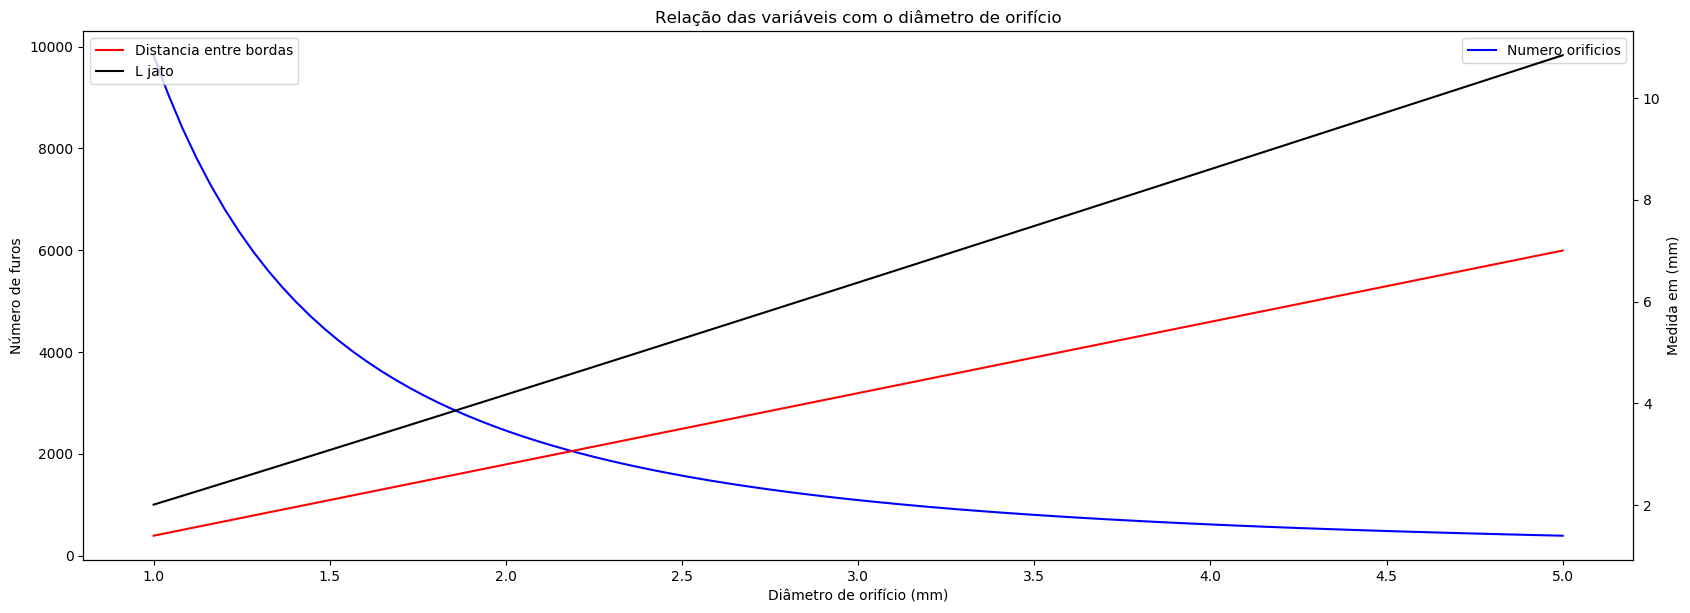

In [30]:

array_dor = np.linspace(0.001, 0.005, 100)
fig = plt.figure(figsize=(20,7), dpi=100)
diametro_or, num_or, dist_entre_bordas, l_jato = di_orificios(*(array_dor))
ax = plt.axes()
plt.plot(diametro_or, num_or, color='blue', label='Numero orificios')
plt.title('Relação das variáveis com o diâmetro de orifício')
plt.xlabel('Diâmetro de orifício (mm)')
plt.ylabel('Número de furos')
# plt.grid(linestyle='-.')
plt.legend()
a_bordas = ax.twinx()
a_bordas.plot(diametro_or, dist_entre_bordas, color='red', label='Distancia entre bordas')
a_bordas.plot(diametro_or, l_jato, color='black', label='L jato')
plt.ylabel('Medida em (mm)')
# plt.grid()
plt.legend()
# plt.ylim(0, 0.012)
# plt.xlim(0, 0.006)
plt.show()


# Escolhas

## Baseado no gráfico acima, foi escolhido:

In [31]:
diametro_orificio = [0.0035,]
diametro_or, num_or, dist_entre_bordas, l_jato = di_orificios(*diametro_orificio)
print(f'diametro_or:{diametro_or[0]:8.7} num_or: {num_or[0]:8.7} dist_entre_bordas: {dist_entre_bordas[0]:8.7} l_jato: {l_jato[0]:8.7}')

diametro_or:     3.5 num_or: 802.3308 dist_entre_bordas: 4.902969 l_jato: 7.487028


# Etapa 4
## Espaçamento entre os centros dos furos (lado triangular)

In [34]:
diametro_orificio[0]

0.0035

# Etapa 5
## Determinar comprimento do jato

In [33]:
l_jato[0]

7.487028023326959